# Data augmentation with ImageDataGenerator

https://keras.io/preprocessing/image/

In [1]:
%matplotlib inline

import keras
import os
import matplotlib.pyplot as plt

from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
ROOT = r"D:\Data_sets\dogscats\sample\train\dogs" #https://www.kaggle.com/c/dogs-vs-cats

In [3]:
dogs = [os.path.join(ROOT, fname) for fname in os.listdir(ROOT)]

In [4]:
dogs

['D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.1402.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.1614.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.2423.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.6391.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.6768.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.8091.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.8643.jpg',
 'D:\\Data_sets\\dogscats\\sample\\train\\dogs\\dog.9077.jpg']

In [5]:
the_chosen_dog = dogs[0]

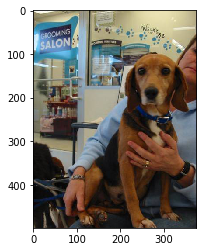

In [6]:
plt.imshow(plt.imread(the_chosen_dog)); #matplotlib read

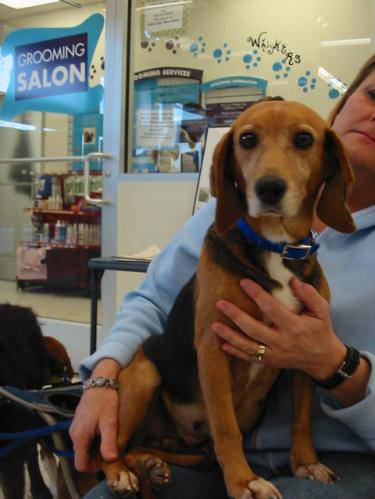

In [7]:
image.load_img(the_chosen_dog) # keras.preprocessing.image read

In [8]:
dog = image.load_img(the_chosen_dog, target_size=(150,150)) #resizing

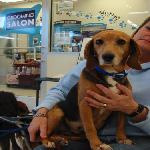

In [9]:
dog

In [10]:
dog_array = image.img_to_array(dog) # (150, 150, 3)

In [11]:
dog_array = dog_array.reshape((1,) + dog_array.shape) #(1, 150, 150, 3)

In [12]:
dog_array.shape

(1, 150, 150, 3)

In [13]:
gen = image.ImageDataGenerator(
    rotation_range=50, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

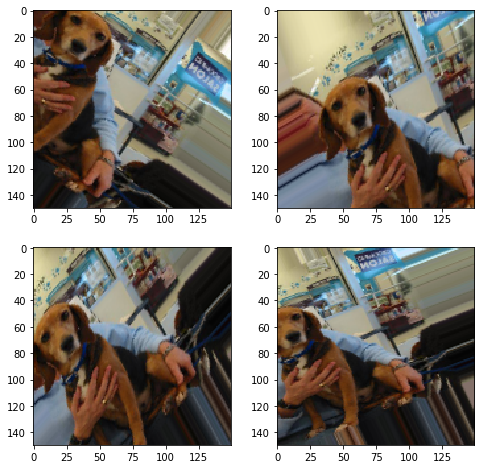

In [14]:
fig=plt.figure(figsize=(8, 8))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    
    dogim = next(gen.flow(dog_array, batch_size=1)).reshape(150,150,3)
    dogim = image.array_to_img(dogim)
    plt.imshow(dogim)